Лабораторная работа №2 Разработка
синтаксического LL(1)-анализатора

***Цель:***
Научиться разрабатывать LL(1)-анализатор формального языка, для которого сущетвует
LL(1)-грамматика.


***Смысл:***
Спомощью формальных языков можно создавать пользовательские интерфейсы в
ограниченных предметных областях, имитирующие человеческую речь.


***Задача.***
Пусть дано слово в некотором алфавите. Определить с помощью LL(1)-анализатора
принадлежит ли данное слово формальному языку, заданному ниже, или нет:

* переменные,
* целочисленные константы,
* true, false,
* арифметические операции,
* логические операции,
* функции,
* предикаты


***Форма отчетности.***
Результатом выполнения лабораторной работы является программный код, который
интерпертирует входящие слова формального языка. Программный код выложен в
репозиторий на github/gitlab.


В соответствии с поставленным заданием была разработана LL(1)-грамматика:

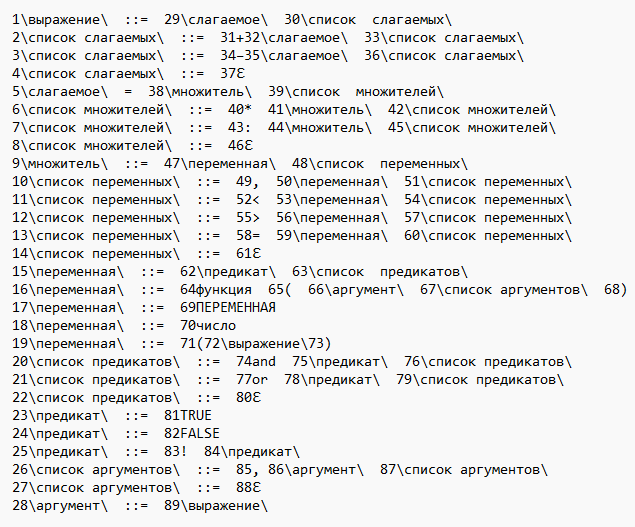

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Таблица:
https://docs.google.com/spreadsheets/d/19OayqZ8uvaYV_9y5gBjNru8jpQ4hB0J-/edit?usp=sharing&ouid=110762048589547385728&rtpof=true&sd=true

In [3]:
df = pd.read_excel("/content/drive/MyDrive/РИС ЛР 2.xlsx", index_col = "№")
# df = pd.read_excel("/content/РИС ЛР 2.xlsx", index_col = "№")
print(df)

            множество направляющих символов  next  return  stack  accept  \
№                                                                          
1   end ) ( const perem  true false not def    29       0      0       0   
2                                         +    31       0      0       0   
3                                         -    34       0      0       0   
4                                     end )    37       0      0       0   
5          ( def perem const true false not    38       0      0       0   
..                                      ...   ...     ...    ...     ...   
85                                        ,    86       0      0       1   
86  end ) ( const perem  true false not def    28       0      1       0   
87  end ) ( const perem  true false not def    26       0      0       0   
88  end ) ( const perem  true false not def    -1       1      0       0   
89  end ) ( const perem  true false not def     1       0      0       0   

    error  

In [4]:
dictionary = {}
for i in range(1, df.shape[0]+1):
  dictionary[i] = []
  for j in df.columns:
    dictionary[i].append(df[j][i])

dictionary

{1: ['end ) ( const perem  true false not def', 29, 0, 0, 0, 1],
 2: ['+', 31, 0, 0, 0, 0],
 3: ['-', 34, 0, 0, 0, 0],
 4: ['end )', 37, 0, 0, 0, 1],
 5: ['( def perem const true false not', 38, 0, 0, 0, 1],
 6: ['*', 40, 0, 0, 0, 0],
 7: ['/', 43, 0, 0, 0, 0],
 8: ['end ) + -', 46, 0, 0, 0, 1],
 9: ['( def perem const true false not', 47, 0, 0, 0, 1],
 10: [',', 49, 0, 0, 0, 0],
 11: ['<', 52, 0, 0, 0, 0],
 12: ['>', 55, 0, 0, 0, 0],
 13: ['=', 58, 0, 0, 0, 0],
 14: [', < > = end ) + - * /', 61, 0, 0, 0, 1],
 15: ['true false not', 62, 0, 0, 0, 0],
 16: ['def', 64, 0, 0, 0, 0],
 17: ['perem', 69, 0, 0, 0, 0],
 18: ['const', 70, 0, 0, 0, 0],
 19: ['(', 71, 0, 0, 0, 1],
 20: ['and', 74, 0, 0, 0, 0],
 21: ['or', 77, 0, 0, 0, 0],
 22: ['and or not ) end', 80, 0, 0, 0, 1],
 23: ['true', 81, 0, 0, 0, 0],
 24: ['false', 82, 0, 0, 0, 0],
 25: ['not', 83, 0, 0, 0, 1],
 26: [',', 85, 0, 0, 0, 0],
 27: ['end )', 88, 0, 0, 0, 1],
 28: ['end ) ( const perem  true false not def', 89, 0, 0, 0, 1],
 

In [5]:
def ll1(word):
  n = 1
  word = word.split()
  word.append("end")
  stack = []

  for i in range(len(word)):
    
    symbol = word[i]
    print("symbol =", symbol)

    accept = 0
    error = 0
    end = 0

    while(not(accept) or not(error) or not(end)):
      print(n, " -> ")

      if (symbol == "end" and (symbol in dictionary[n][0]) and len(stack) == 0):
        end = 1

      if (symbol.isdigit()):
        symbol = "count"

      m = ", ) ( true false * / + - or and not end const def = < >".split()
      if i != len(word)-1 and (symbol not in m):
        symbol = ("def" if ((word[i+1] == '(')) else symbol)
      
      if (symbol not in m):
        symbol = ("perem")
      
      if ((symbol in dictionary[n][0]) and not(end)):

        # Return
        new_n = n
        if dictionary[n][2] ==  1:
          new_n = stack.pop()
          print(n, "Берем из stack", new_n)
          print("stack:", stack)
        else:
          new_n = dictionary[n][1]

        # Statck
        if dictionary[n][3] ==  1:
          print(n, "Записываем в stack", n+1)
          stack.append(n+1)
          print("stack:", stack)

        # Accept
        if dictionary[n][4] ==  1:
          accept = 1
          print(n, "ACCEPT")
          print("----------------------------\n")
          n = new_n
          break

        n = new_n

      elif end:
        break
      # Error
      elif dictionary[n][5] ==  0:
          n += 1
      else: 
        error = 1;
        break
    
    if error: 
      print("!!!ERROR!!!")
      break

    if end:
      print("--------------------------------------------") 
      print("Слово принадлежит данному формальному языку.")
      break

При вводе слова для проверки все символы необходимо разделять пробелом.

In [6]:
15 - 8 * ( 10 + 5 / 7 - ( 15 + 2 ) )

65.28571428571429

In [7]:
ll1("15 - 8 * ( 10 + 5 / 7 - ( 15 + 2 ) )")

symbol = 15
1  -> 
29  -> 
29 Записываем в stack 30
stack: [30]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [30, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 39, 48]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 48
stack: [30, 39]
69 ACCEPT
----------------------------

symbol = -
48  -> 
10  -> 
11  -> 
12  -> 
13  -> 
14  -> 
61  -> 
61 Берем из stack 39
stack: [30]
39  -> 
6  -> 
7  -> 
8  -> 
46  -> 
46 Берем из stack 30
stack: []
30  -> 
2  -> 
3  -> 
34  -> 
34 ACCEPT
----------------------------

symbol = 8
35  -> 
35 Записываем в stack 36
stack: [36]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [36, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [36, 39, 48]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 48
stack: [36, 39]
69 ACCEPT
----------------------------

symbol = *
48  -> 
10  -> 
11  -> 
12  -> 
13  -> 
14  -> 
61  -> 
61 Берем из stack 39
stack: [36]
39  -> 
6  -> 
40  -> 
40 ACCEPT
----------------------------

symbol = (
41  -> 
41 Записыв

In [8]:
q = 5

In [9]:
ll1("q = 5")

symbol = q
1  -> 
29  -> 
29 Записываем в stack 30
stack: [30]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [30, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 39, 48]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 48
stack: [30, 39]
69 ACCEPT
----------------------------

symbol = =
48  -> 
10  -> 
11  -> 
12  -> 
13  -> 
58  -> 
58 ACCEPT
----------------------------

symbol = 5
59  -> 
59 Записываем в stack 60
stack: [30, 39, 60]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 60
stack: [30, 39]
69 ACCEPT
----------------------------

symbol = end
60  -> 
10  -> 
11  -> 
12  -> 
13  -> 
14  -> 
61  -> 
61 Берем из stack 39
stack: [30]
39  -> 
6  -> 
7  -> 
8  -> 
46  -> 
46 Берем из stack 30
stack: []
30  -> 
--------------------------------------------
Слово принадлежит данному формальному языку.


In [10]:
ll1("def ( f , fg ) * 2 + def2 ( fg + 3 )")

symbol = def
1  -> 
29  -> 
29 Записываем в stack 30
stack: [30]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [30, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 39, 48]
15  -> 
16  -> 
64  -> 
64 ACCEPT
----------------------------

symbol = (
65  -> 
65 ACCEPT
----------------------------

symbol = f
66  -> 
66 Записываем в stack 67
stack: [30, 39, 48, 67]
89  -> 
1  -> 
29  -> 
29 Записываем в stack 30
stack: [30, 39, 48, 67, 30]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [30, 39, 48, 67, 30, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 39, 48, 67, 30, 39, 48]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 48
stack: [30, 39, 48, 67, 30, 39]
69 ACCEPT
----------------------------

symbol = ,
48  -> 
10  -> 
49  -> 
49 ACCEPT
----------------------------

symbol = fg
50  -> 
50 Записываем в stack 51
stack: [30, 39, 48, 67, 30, 39, 51]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 51
stack: [30, 39, 48, 67, 30, 39]
69 ACCEPT
----------------------------

In [11]:
5 + 2 /

SyntaxError: ignored

In [12]:
ll1("5 + 2 /")

symbol = 5
1  -> 
29  -> 
29 Записываем в stack 30
stack: [30]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [30, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 39, 48]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 48
stack: [30, 39]
69 ACCEPT
----------------------------

symbol = +
48  -> 
10  -> 
11  -> 
12  -> 
13  -> 
14  -> 
61  -> 
61 Берем из stack 39
stack: [30]
39  -> 
6  -> 
7  -> 
8  -> 
46  -> 
46 Берем из stack 30
stack: []
30  -> 
2  -> 
31  -> 
31 ACCEPT
----------------------------

symbol = 2
32  -> 
32 Записываем в stack 33
stack: [33]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [33, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [33, 39, 48]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 48
stack: [33, 39]
69 ACCEPT
----------------------------

symbol = /
48  -> 
10  -> 
11  -> 
12  -> 
13  -> 
14  -> 
61  -> 
61 Берем из stack 39
stack: [33]
39  -> 
6  -> 
7  -> 
43  -> 
43 ACCEPT
----------------------------

symbol = end
44  -> 
!!!ERROR!

In [13]:
 True or True and not True

True

In [14]:
ll1("true or true and not true")

symbol = true
1  -> 
29  -> 
29 Записываем в stack 30
stack: [30]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [30, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 39, 48]
15  -> 
62  -> 
62 Записываем в stack 63
stack: [30, 39, 48, 63]
23  -> 
81  -> 
81 Берем из stack 63
stack: [30, 39, 48]
81 ACCEPT
----------------------------

symbol = or
63  -> 
20  -> 
21  -> 
77  -> 
77 ACCEPT
----------------------------

symbol = true
78  -> 
78 Записываем в stack 79
stack: [30, 39, 48, 79]
23  -> 
81  -> 
81 Берем из stack 79
stack: [30, 39, 48]
81 ACCEPT
----------------------------

symbol = and
79  -> 
20  -> 
74  -> 
74 ACCEPT
----------------------------

symbol = not
75  -> 
75 Записываем в stack 76
stack: [30, 39, 48, 76]
23  -> 
24  -> 
25  -> 
83  -> 
83 ACCEPT
----------------------------

symbol = true
84  -> 
23  -> 
81  -> 
81 Берем из stack 76
stack: [30, 39, 48]
81 ACCEPT
----------------------------

symbol = end
76  -> 
20  -> 
21  -> 
22  -> 
80  -> 
80 Берем из s

In [15]:
ll1(" cos ( alpha , x , y ) * not false and true ")

symbol = cos
1  -> 
29  -> 
29 Записываем в stack 30
stack: [30]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [30, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 39, 48]
15  -> 
16  -> 
64  -> 
64 ACCEPT
----------------------------

symbol = (
65  -> 
65 ACCEPT
----------------------------

symbol = alpha
66  -> 
66 Записываем в stack 67
stack: [30, 39, 48, 67]
89  -> 
1  -> 
29  -> 
29 Записываем в stack 30
stack: [30, 39, 48, 67, 30]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [30, 39, 48, 67, 30, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 39, 48, 67, 30, 39, 48]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 48
stack: [30, 39, 48, 67, 30, 39]
69 ACCEPT
----------------------------

symbol = ,
48  -> 
10  -> 
49  -> 
49 ACCEPT
----------------------------

symbol = x
50  -> 
50 Записываем в stack 51
stack: [30, 39, 48, 67, 30, 39, 51]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 51
stack: [30, 39, 48, 67, 30, 39]
69 ACCEPT
-------------------------

In [16]:
from math import cos
x = cos( 120 )

In [17]:
ll1("x = cos ( 120 )")

symbol = x
1  -> 
29  -> 
29 Записываем в stack 30
stack: [30]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [30, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 39, 48]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 48
stack: [30, 39]
69 ACCEPT
----------------------------

symbol = =
48  -> 
10  -> 
11  -> 
12  -> 
13  -> 
58  -> 
58 ACCEPT
----------------------------

symbol = cos
59  -> 
59 Записываем в stack 60
stack: [30, 39, 60]
15  -> 
16  -> 
64  -> 
64 ACCEPT
----------------------------

symbol = (
65  -> 
65 ACCEPT
----------------------------

symbol = 120
66  -> 
66 Записываем в stack 67
stack: [30, 39, 60, 67]
89  -> 
1  -> 
29  -> 
29 Записываем в stack 30
stack: [30, 39, 60, 67, 30]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [30, 39, 60, 67, 30, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 39, 60, 67, 30, 39, 48]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 48
stack: [30, 39, 60, 67, 30, 39]
69 ACCEPT
----------------------------

symbo

In [18]:
5 * (not True)

0

In [19]:
ll1("5 * ( not true )")

symbol = 5
1  -> 
29  -> 
29 Записываем в stack 30
stack: [30]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [30, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 39, 48]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 48
stack: [30, 39]
69 ACCEPT
----------------------------

symbol = *
48  -> 
10  -> 
11  -> 
12  -> 
13  -> 
14  -> 
61  -> 
61 Берем из stack 39
stack: [30]
39  -> 
6  -> 
40  -> 
40 ACCEPT
----------------------------

symbol = (
41  -> 
41 Записываем в stack 42
stack: [30, 42]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 42, 48]
15  -> 
16  -> 
17  -> 
18  -> 
19  -> 
71  -> 
71 ACCEPT
----------------------------

symbol = not
72  -> 
72 Записываем в stack 73
stack: [30, 42, 48, 73]
1  -> 
29  -> 
29 Записываем в stack 30
stack: [30, 42, 48, 73, 30]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [30, 42, 48, 73, 30, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 42, 48, 73, 30, 39, 48]
15  -> 
62  -> 
62 Записываем в stack 63
stack: [30, 42

In [20]:
dictionary2 = []

In [21]:
ll1('dictionary2 = []')

symbol = dictionary2
1  -> 
29  -> 
29 Записываем в stack 30
stack: [30]
5  -> 
38  -> 
38 Записываем в stack 39
stack: [30, 39]
9  -> 
47  -> 
47 Записываем в stack 48
stack: [30, 39, 48]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 48
stack: [30, 39]
69 ACCEPT
----------------------------

symbol = =
48  -> 
10  -> 
11  -> 
12  -> 
13  -> 
58  -> 
58 ACCEPT
----------------------------

symbol = []
59  -> 
59 Записываем в stack 60
stack: [30, 39, 60]
15  -> 
16  -> 
17  -> 
69  -> 
69 Берем из stack 60
stack: [30, 39]
69 ACCEPT
----------------------------

symbol = end
60  -> 
10  -> 
11  -> 
12  -> 
13  -> 
14  -> 
61  -> 
61 Берем из stack 39
stack: [30]
39  -> 
6  -> 
7  -> 
8  -> 
46  -> 
46 Берем из stack 30
stack: []
30  -> 
--------------------------------------------
Слово принадлежит данному формальному языку.
